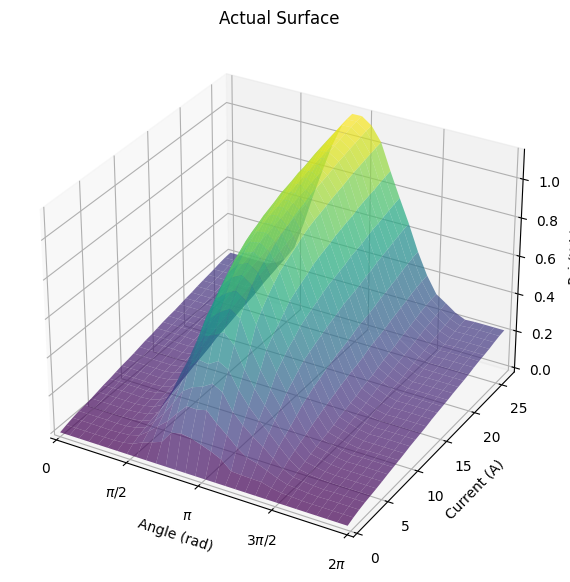

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Set the maximum angle value to 2*pi
max_angle = 2 * np.pi
current_max = 360  # Assuming 360 is the original maximum for scaling
scale_factor = max_angle / current_max  # Scaling factor to transform degrees to radians

# Define the range for currents
i_max = 100
i_step = 5
i = np.arange(0, i_max + i_step, i_step)  # Range of currents (A)

# Load the data from the MAT file
data = scipy.io.loadmat('GRAPH_psi_teta_I.mat')  # Replace with actual file name if different

# Extract the relevant slices from the 3D arrays
PSI = data['PsiInt'][:, :, 0]  # Assuming you want the first slice
teta = data['teta_grad'][:, :, 0]  # Assuming you want the first slice
I = data['I_A'][:, :, 0]  # Assuming you want the first slice

# Apply the scaling factor to transform teta from degrees to radians (0 to 2*pi)
teta *= scale_factor

# Set all variables to 0 where current is 0
zero_current_idx = (I == 0)
teta[zero_current_idx] = 0
PSI[zero_current_idx] = 0

# Create meshgrid for surface plotting
X_mesh, Y_mesh = np.meshgrid(np.linspace(teta.min(), teta.max(), 30),
                             np.linspace(I.min(), I.max(), 30))

# Interpolating actual PSI values for the meshgrid
points = np.column_stack([teta.ravel(), I.ravel()])
values = PSI.ravel()
Z_actual = griddata(points, values, (X_mesh, Y_mesh), method='linear')

# Set actual values to 0 where current is 0
zero_current_mesh_idx = (Y_mesh == 0)
Z_actual[zero_current_mesh_idx] = 0

# Create figure and plot the actual surface
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_mesh, Y_mesh, Z_actual, cmap='viridis', alpha=0.7)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Current (A)')
ax.set_zlabel('Psi (Wb)')
ax.set_title('Actual Surface')

# Set axis limits and ticks for the angle from 0 to 2*pi
ax.set_xlim([0, max_angle])
ax.set_ylim([I.min(), I.max()])
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

plt.show()
